# Hypothesis Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
plt.rcParams.update({'font.size': 22})
%matplotlib inline

### Hypothesis Testing Overview

##### Concepts Explanation with Example

Generate the data

In [2]:
random.seed(2020)
math2019 = [random.normalvariate(75,5) for _ in range(900)]
math2020 = [random.normalvariate(73,5) for _ in range(900)]

Plot the data

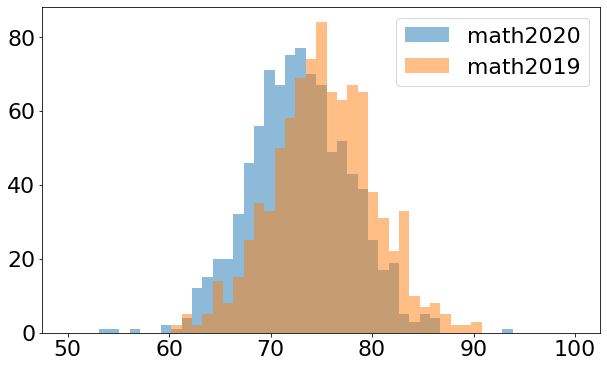

In [3]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 22})
plt.hist(math2020,bins=np.linspace(50,100,50),alpha=0.5,label="math2020")
plt.hist(math2019,bins=np.linspace(50,100,50),alpha=0.5,label="math2019")
plt.legend();

Calcualte the statistics

In [4]:
from scipy import stats
stats.describe(math2020)

DescribeResult(nobs=900, minmax=(53.61680120097629, 93.29408158813376), mean=72.89645796453996, variance=24.81446705891462, skewness=0.007960630504578523, kurtosis=0.3444548003252992)

### P-value, example 1

In [5]:
random.seed(2020)
results = []
for _ in range(1000000):
    results.append(sum([random.random() < 0.5 for i in range(6)]))

In [6]:
from collections import Counter
from math import factorial as factorial
counter = Counter(results)
for head in sorted(counter.keys()):
    comput = counter[head]/1000000
    theory = 0.5**6*factorial(6)/factorial(head)/factorial(6-head)
    print("heads: {}; Computational: {}; Theoretical: {}".format(head,comput, theory))

heads: 0; Computational: 0.015913; Theoretical: 0.015625
heads: 1; Computational: 0.093367; Theoretical: 0.09375
heads: 2; Computational: 0.234098; Theoretical: 0.234375
heads: 3; Computational: 0.312343; Theoretical: 0.3125
heads: 4; Computational: 0.234654; Theoretical: 0.234375
heads: 5; Computational: 0.093995; Theoretical: 0.09375
heads: 6; Computational: 0.01563; Theoretical: 0.015625


### P-value, example 2

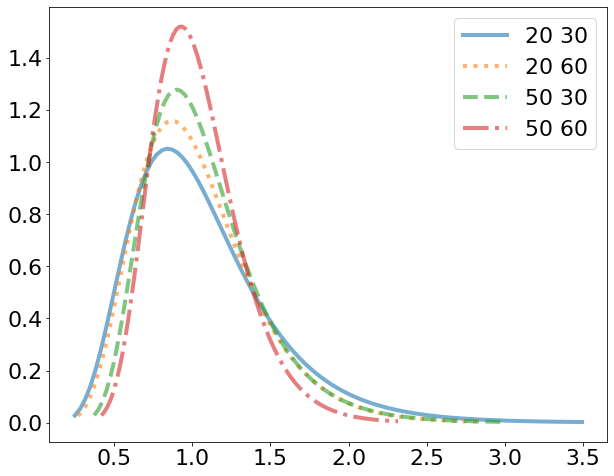

In [7]:
from scipy.stats import f

plt.figure(figsize=(10,8))
styles = ["-",":","--","-."]
for i, [dfn, dfd] in enumerate([[20,30],[20,60],[50,30],[50,60]]):
    x = np.linspace(f.ppf(0.001, dfn, dfd), f.ppf(0.999, dfn, dfd), 100)
    plt.plot(x, f.pdf(x, dfn, dfd), linestyle= styles[i], 
             lw=4, alpha=0.6, 
             label='{} {}'.format(dfn,dfd))
plt.legend();

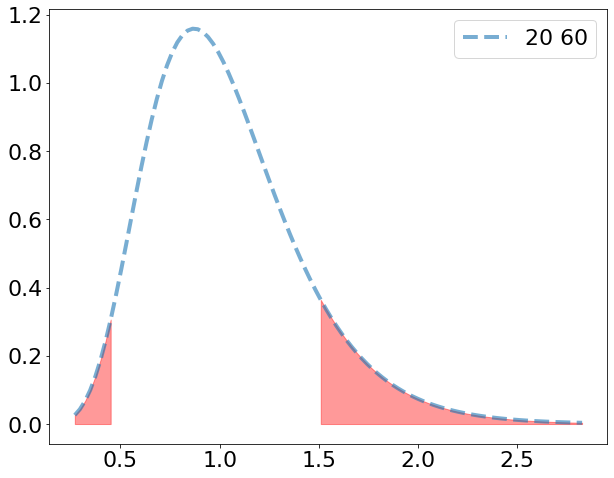

In [8]:
plt.figure(figsize=(10,8))
[dfn, dfd] =[20,60]
x = np.linspace(f.ppf(0.001, dfn, dfd), f.ppf(0.999, dfn, dfd), 100)
plt.plot(x, 
         f.pdf(x, dfn, dfd), 
         linestyle= "--", 
         lw=4, alpha=0.6, 
         label='{} {}'.format(dfn,dfd))
right = x[x>1.5]
left = x[f.pdf(x, dfn, dfd) < f.pdf(right,dfn,dfd)[0]][0:8]
plt.fill_between(right,f.pdf(right,dfn,dfd),alpha=0.4,color="r")
plt.fill_between(left,f.pdf(left,dfn,dfd),alpha=0.4,color="r")
plt.legend();


P-value

In [9]:
f.cdf(left[-1],dfn,dfd) + (1-f.cdf(right[0],dfn,dfd))

0.1370736956909769

### t-distributions

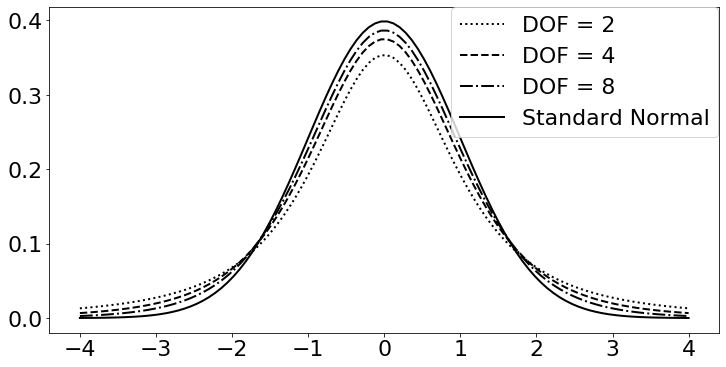

In [10]:
from scipy.stats import t, norm
plt.figure(figsize=(12,6))
DOFs = [2,4,8]
linestyles= [":","--","-."]
for i, df in enumerate(DOFs):
    x = np.linspace(-4, 4, 100)
    rv = t(df)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label= "DOF = " + str(df),linestyle=linestyles[i]);

plt.plot(x,norm(0,1).pdf(x),'k-', lw=2, label="Standard Normal")
plt.legend(loc=[0.6,0.6]);

#### t-statistic and their corresponding locations

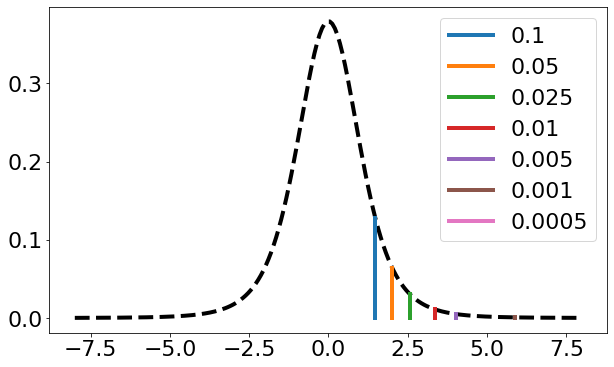

In [11]:
plt.figure(figsize=(10,6))
df = 5
x = np.linspace(-8, 8, 200)
rv = t(df)
plt.plot(x, rv.pdf(x), 'k-', lw=4,linestyle="--");
alphas = [0.1,0.05,0.025,0.01,0.005,0.001,0.0005]
threasholds = [1.476,2.015,2.571,3.365,4.032,5.894,6.869]
for thre, alpha in zip(threasholds,alphas):
    plt.plot([thre,thre],[0,rv.pdf(thre)] ,label = "{}".format(str(alpha)),linewidth=4)
plt.legend();

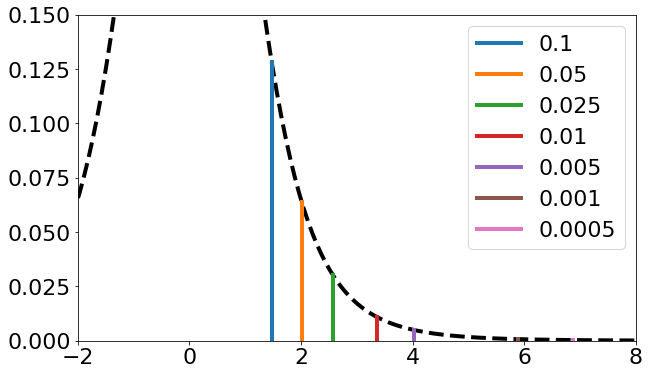

In [12]:
plt.figure(figsize=(10,6))
df = 5
x = np.linspace(-8, 8, 200)
rv = t(df)
plt.plot(x, rv.pdf(x), 'k-', lw=4,linestyle="--");
alphas = [0.1,0.05,0.025,0.01,0.005,0.001,0.0005]
threasholds = [1.476,2.015,2.571,3.365,4.032,5.894,6.869]
for thre, alpha in zip(threasholds,alphas):
    plt.plot([thre,thre],[0,rv.pdf(thre)] ,label = "{}".format(str(alpha)),linewidth=4)
plt.xlim(-2,8)
plt.ylim(0,0.15)
plt.legend();

The t-statistic of math score example

In [13]:
(np.mean(math2020)-75)/(np.std(math2020)/30)

-12.675391510437716

### Compare two-tail and one-tail significance level

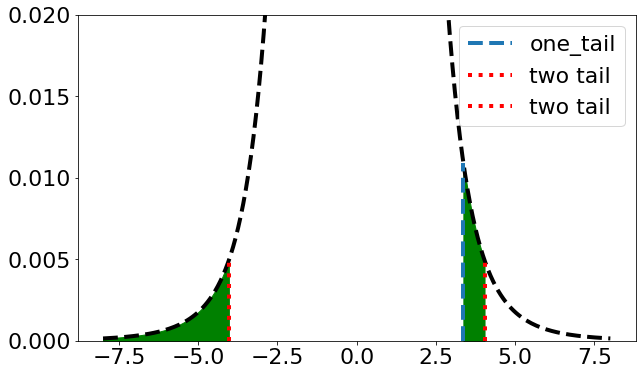

In [14]:
plt.figure(figsize=(10,6))
df = 5
x = np.linspace(-8, 8, 200)
rv = t(df)
plt.plot(x, rv.pdf(x), 'k-', lw=4,linestyle="--");
alpha=0.01
one_tail = 3.365
two_tail = 4.032
plt.plot([one_tail,one_tail],[0,rv.pdf(one_tail)] ,
         label = "one_tail",linewidth=4,linestyle="--")
plt.plot([two_tail,two_tail],[0,rv.pdf(two_tail)] ,
         label = "two tail",linewidth=4,color="r",linestyle=":")
plt.plot([-two_tail,-two_tail],[0,rv.pdf(two_tail)] ,
         label = "two tail",linewidth=4,color="r",linestyle=":")

plt.fill_between(np.linspace(-8,-two_tail,200),
                 rv.pdf(np.linspace(-8,-two_tail,200)),color="g")
plt.fill_between(np.linspace(one_tail,two_tail,200),
                 rv.pdf(np.linspace(one_tail,two_tail,200)),color="g")
plt.ylim(0,0.02)
plt.legend();

## SciPy Examples

### Example 1, t-test

In [15]:
from scipy import stats
stats.ttest_1samp(math2020,75.0)

Ttest_1sampResult(statistic=-12.668347669098846, pvalue=5.842470780196407e-34)

#### Two-sample t-test

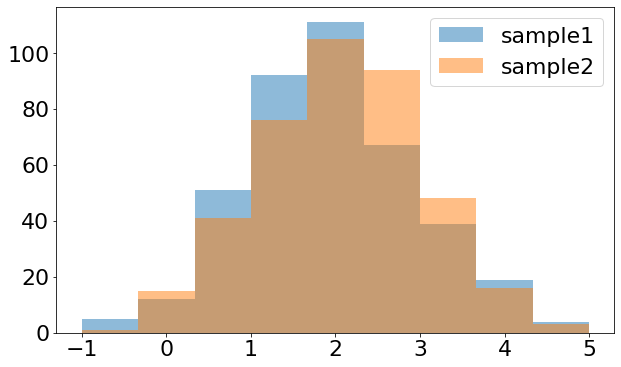

In [16]:
np.random.seed(2020)
sample1 = np.random.normal(2,1,400)
sample2 = np.random.normal(2.1,1,400)
plt.figure(figsize=(10,6))
plt.hist(sample1,bins=np.linspace(-1,5,10),alpha=0.5,label="sample1")
plt.hist(sample2,bins=np.linspace(-1,5,10),alpha=0.5,label="sample2")
plt.legend();

In [17]:
 stats.ttest_ind(sample1,sample2)

Ttest_indResult(statistic=-1.7765855804956159, pvalue=0.07601736167057595)

In [18]:
np.random.seed(2020)
p_values = []
for _ in range(100):
    sample1 = np.random.normal(2,1,900)
    sample2 = np.random.normal(2.1,1,900)
    p_values.append(stats.ttest_ind(sample1,sample2)[1])

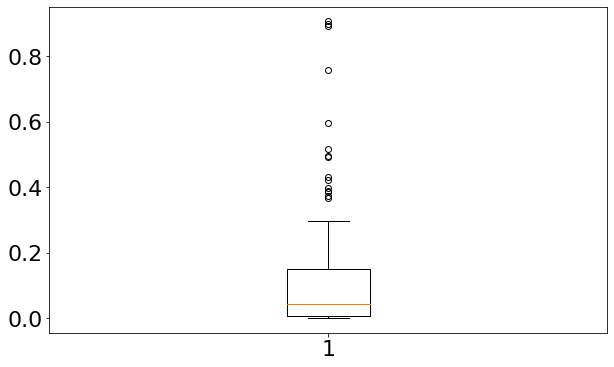

In [19]:
plt.figure(figsize=(10,6))
plt.boxplot(p_values);

#### two-sample t-test, different variance

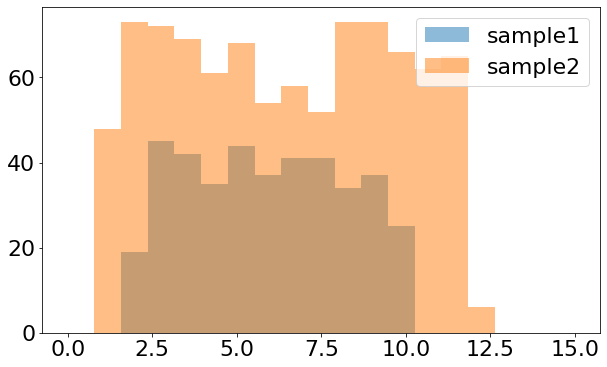

In [20]:
np.random.seed(2020)
sample1 = np.random.uniform(2,10,400)
sample2 = np.random.uniform(1,12,900)
plt.figure(figsize=(10,6))
plt.hist(sample1,bins=np.linspace(0,15,20),alpha=0.5,label="sample1")
plt.hist(sample2,bins=np.linspace(0,15,20),alpha=0.5,label="sample2")
plt.legend();

In [21]:
 stats.ttest_ind(sample1,sample2,equal_var=False)

Ttest_indResult(statistic=-3.1364786834852163, pvalue=0.0017579405400172416)

### Example 2, normality test

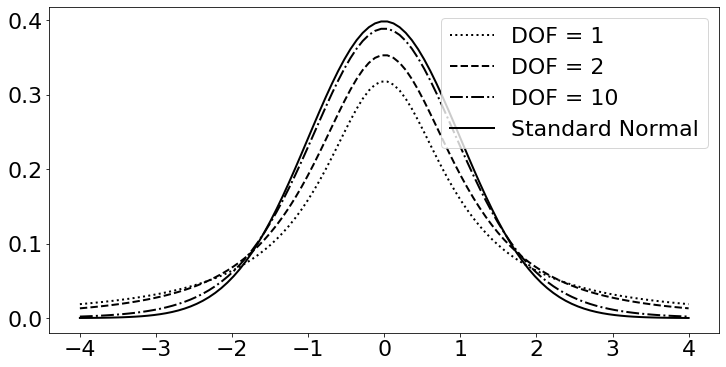

In [22]:
from scipy.stats import t, norm
plt.figure(figsize=(12,6))
DOFs = [1,2,10]
linestyles= [":","--","-."]
for i, df in enumerate(DOFs):
    x = np.linspace(-4, 4, 100)
    rv = t(df)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label= "DOF = " + str(df),linestyle=linestyles[i]);

plt.plot(x,norm(0,1).pdf(x),'k-', lw=2, label="Standard Normal")
plt.legend();

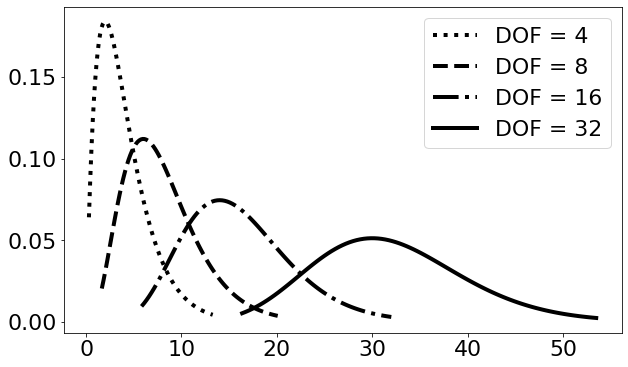

In [23]:
from scipy.stats import chi2
plt.figure(figsize=(10,6))
DOFs = [4,8,16,32]
linestyles= [":","--","-.","-"]
for i, df in enumerate(DOFs):
    x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
    rv = chi2(df)
    plt.plot(x, rv.pdf(x), 'k-', lw=4, 
             label= "DOF = " + str(df),linestyle=linestyles[i]);
plt.legend();

#### Generate samples

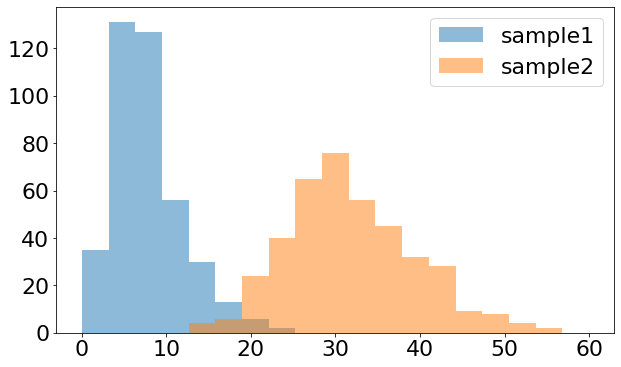

In [24]:
np.random.seed(2020)
sample1= np.random.chisquare(8,400)
sample2 = np.random.chisquare(32,400)
plt.figure(figsize=(10,6))
plt.hist(sample1,bins=np.linspace(0,60,20),alpha=0.5,label="sample1")
plt.hist(sample2,bins=np.linspace(0,60,20),alpha=0.5,label="sample2")
plt.legend();

##### Test the normality

In [25]:
from scipy.stats import shapiro, anderson

In [26]:
print("Results for Shapiro-Wilk Test: ")
print("Sample 1:", shapiro(sample1))
print("Sample 2:", shapiro(sample2))
print()
print("Results for Anderson-Darling Test:")
print("Sample 1:", anderson(sample1))
print("Sample 2:", anderson(sample2))

Results for Shapiro-Wilk Test: 
Sample 1: (0.9361660480499268, 4.538336286635802e-12)
Sample 2: (0.9820653796195984, 7.246905443025753e-05)

Results for Anderson-Darling Test:
Sample 1: AndersonResult(statistic=6.007815329566711, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Sample 2: AndersonResult(statistic=1.8332323421475962, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Test a real normal distributed data

In [51]:
sample3 = np.random.normal(0,1,400)
print("Results for Shapiro-Wilk Test: ")
print("Sample 3:", shapiro(sample3))
print()
print("Results for Anderson-Darling Test:")
print("Sample 3:", anderson(sample3))

Results for Shapiro-Wilk Test: 
Sample 3: (0.9969498515129089, 0.6611998081207275)

Results for Anderson-Darling Test:
Sample 3: AndersonResult(statistic=0.21440419351193896, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


### Example 3,  Goodness of Fit Test

In [52]:
from scipy.special import comb
P = [comb(39,3-i)*comb(13,i)/comb(52,3) for i in range(4)]
expected = [1023*p for p in P]
observed = [460,451,102,10]

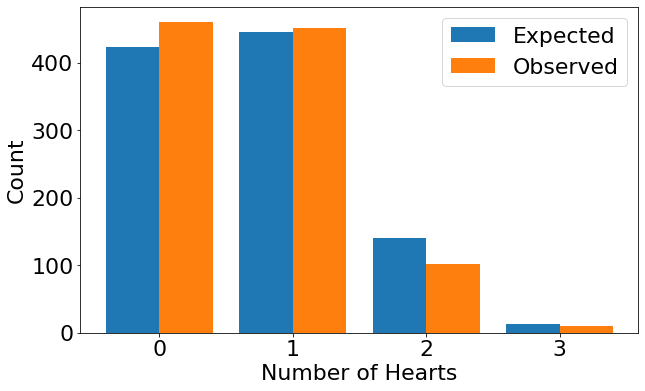

In [29]:
x = np.array([0,1,2,3])
plt.figure(figsize=(10,6))
plt.bar(x-0.2,expected,width=0.4,label="Expected")
plt.bar(x+0.2,observed,width=0.4, label= "Observed")
plt.legend()
plt.xticks(ticks=[0,1,2,3])
plt.xlabel("Number of Hearts")
plt.ylabel("Count");

##### Do the test

In [30]:
from scipy.stats import chisquare
chisquare(observed,expected)

Power_divergenceResult(statistic=14.777716323788255, pvalue=0.002016803916729754)

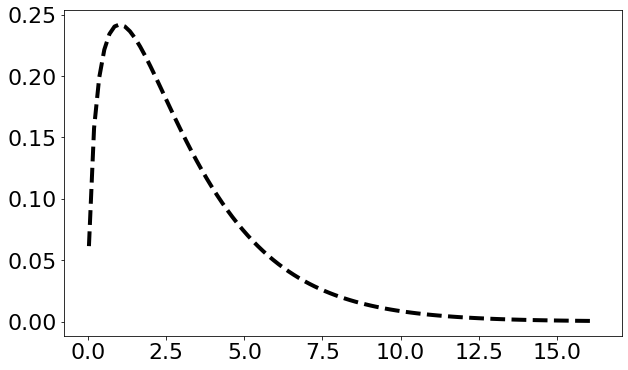

In [31]:
plt.figure(figsize=(10,6))
x = np.linspace(chi2.ppf(0.001, 3),chi2.ppf(0.999, 3), 100)
rv = chi2(3)
plt.plot(x, rv.pdf(x), 'k-', lw=4, 
         label= "DOF = " + str(3),linestyle="--");

##### Numerical evaluation

In [32]:
SF = np.array([120000,110300,127800,68900,79040,208000,159000,89000])
LA = np.array([65700,88340,240000,190000,45080,25900,69000,120300])
BO = np.array([87999,86340,98000,124000,113800,98000,108000,78080])
NY = np.array([300000,62010,45000,130000,238000,56000,89000,123000])

In [33]:
mu = np.mean(np.concatenate((SF,LA,BO,NY)))
ST = np.sum((np.concatenate((SF,LA,BO,NY)) - mu)**2)
SW = np.sum((SF-np.mean(SF))**2) +np.sum((LA-np.mean(LA))**2) + \
np.sum((BO-np.mean(BO))**2)+ np.sum((NY-np.mean(NY))**2)
SB = 8*(np.mean(SF)-mu)**2 + 8*(np.mean(LA)-mu)**2 + \
8*(np.mean(BO)-mu)**2 + 8*(np.mean(NY)-mu)**2

In [34]:
ST == SW+SB

True

In [35]:
print(ST,SW,SB)

119342699672.21875 114578236693.375 4764462978.84375


In [36]:
F = SB/(4-1)/(SW/(4*8-4))
F

0.38810442907126874

In [37]:
from scipy.stats import f

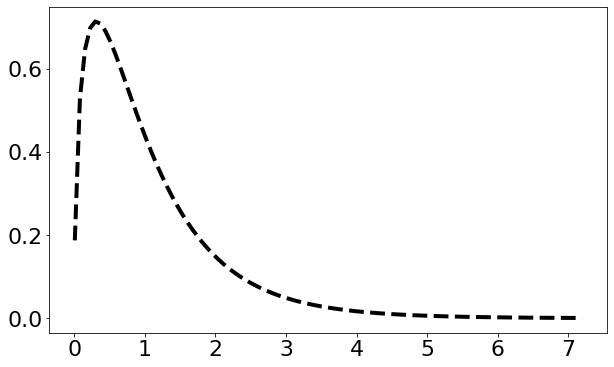

In [38]:
plt.figure(figsize=(10,6))
x = np.linspace(f.ppf(0.001, 3, 28),f.ppf(0.999, 3, 28), 100)
rv = f(dfn=3,dfd=28)
plt.plot(x, rv.pdf(x), 'k-', lw=4,linestyle="--");

In [39]:
from scipy.stats import f_oneway
f_oneway(LA,NY,SF,BO)

F_onewayResult(statistic=0.38810442907126874, pvalue=0.7624301696455358)

### Statistical Test for Time Series Model

##### White noise

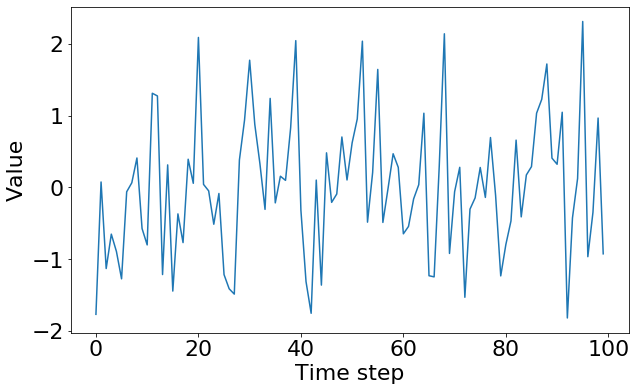

In [40]:
np.random.seed(2020)
plt.figure(figsize=(10,6))
white_noise = [np.random.normal() for _ in range(100)]
plt.xlabel("Time step")
plt.ylabel("Value")
plt.plot(white_noise);

##### Random walk and modified random walk

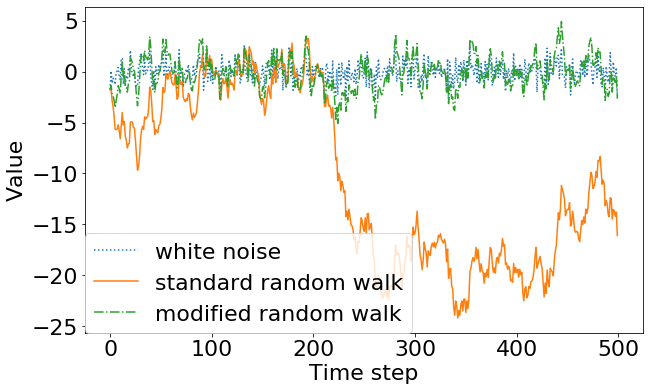

In [41]:
plt.figure(figsize=(10,6))
np.random.seed(2020)
white_noise = [np.random.normal() for _ in range(500)]
random_walk_modified = [white_noise[0]]
for i in range(1,500):
    random_walk_modified.append(random_walk_modified[-1]*0.8 \
                                + white_noise[i])
random_walk = np.cumsum(white_noise)
plt.plot(white_noise, label = "white noise",linestyle=":")
plt.plot(random_walk, label = "standard random walk")
plt.plot(random_walk_modified, label = "modified random walk",linestyle="-.")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.legend(loc=[0,0]);

##### Another 2nd order auto-regressive model
roots in unit circle

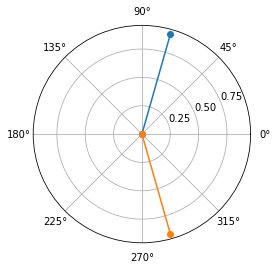

In [42]:
plt.rcParams.update({'font.size': 10})
for root in np.roots([1.2,-0.6,1]):
    plt.polar([0,np.angle(root)],[0,abs(root)],marker='o')
plt.rcParams.update({'font.size': 22})

##### oscillating behavior

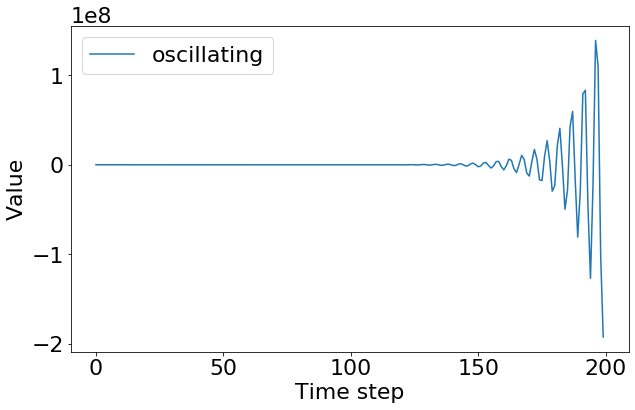

In [43]:
plt.figure(figsize=(10,6))
np.random.seed(2020)
white_noise = [np.random.normal() for _ in range(200)]
series = [white_noise[0],white_noise[1]]
for i in range(2,200):
    series.append(series[i-1]*0.6-series[i-2]*1.2 + white_noise[i])
plt.plot(series, label = "oscillating")
plt.xlabel("Time step")
plt.ylabel("Value")
plt.legend();

##### ADF test

In [44]:
from statsmodels.tsa.stattools import adfuller
adfuller(white_noise)

(-13.456517599662801,
 3.5984059677945306e-25,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 516.1905447452475)

In [45]:
adfuller(random_walk)

(-1.4609492394159564,
 0.5527332285592418,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1374.4481241324318)

In [46]:
adfuller(random_walk_modified)

(-7.700113158114325,
 1.3463404483644221e-11,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1375.6034107373926)

not valid for the `series` time series

In [47]:
adfuller(series)

(-379317593.2132783,
 0.0,
 1,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 518.0917471274431)

### A/B Testing

In [76]:
random.seed(2020)
def build_sample():
    device = "mobile" if np.random.random() < 0.6 else "desktop"
    browser = "chrome" if np.random.random() < 0.9 else "IE"
    wifi = "strong" if np.random.random() < 0.8 else "weak"
    scheme = "warm" if np.random.random() < 0.5 else "cold"
    return (device, browser, wifi, scheme)

In [77]:
from collections import Counter
results = [build_sample() for _ in range(100)]
counter = Counter(results)
for key in sorted(counter, key = lambda x: counter[x]):
    print(key, counter[key])

('desktop', 'IE', 'strong', 'warm') 1
('mobile', 'IE', 'weak', 'cold') 1
('mobile', 'IE', 'strong', 'cold') 2
('mobile', 'chrome', 'weak', 'warm') 3
('mobile', 'chrome', 'weak', 'cold') 4
('desktop', 'chrome', 'weak', 'warm') 4
('desktop', 'chrome', 'weak', 'cold') 5
('desktop', 'IE', 'strong', 'cold') 6
('desktop', 'chrome', 'strong', 'warm') 10
('desktop', 'chrome', 'strong', 'cold') 19
('mobile', 'chrome', 'strong', 'warm') 20
('mobile', 'chrome', 'strong', 'cold') 25


##### more samples

In [78]:
results = [build_sample() for _ in range(10000)]
counter = Counter(results)
for key in sorted(counter, key = lambda x: counter[x]):
    print(key, counter[key])

('desktop', 'IE', 'weak', 'cold') 41
('desktop', 'IE', 'weak', 'warm') 45
('mobile', 'IE', 'weak', 'warm') 55
('mobile', 'IE', 'weak', 'cold') 66
('desktop', 'IE', 'strong', 'warm') 152
('desktop', 'IE', 'strong', 'cold') 189
('mobile', 'IE', 'strong', 'cold') 200
('mobile', 'IE', 'strong', 'warm') 228
('desktop', 'chrome', 'weak', 'cold') 359
('desktop', 'chrome', 'weak', 'warm') 370
('mobile', 'chrome', 'weak', 'cold') 511
('mobile', 'chrome', 'weak', 'warm') 578
('desktop', 'chrome', 'strong', 'warm') 1442
('desktop', 'chrome', 'strong', 'cold') 1489
('mobile', 'chrome', 'strong', 'warm') 2115
('mobile', 'chrome', 'strong', 'cold') 2160
